In [1]:
import nbimporter # Pour pouvoir importer les notebook jupyter

from application import AliceProgram, BobProgram

from squidasm.run.stack.config import StackNetworkConfig
from squidasm.run.stack.run import run

import matplotlib.pyplot as plt

In [4]:
# Import network configuration from file
cfg = StackNetworkConfig.from_file("config.yaml")

# Create instances of programs to run
alice_program = AliceProgram()
bob_program = BobProgram()

# Run the simulation. Programs argument is a mapping of network node labels to programs to run on that node
results = run(config=cfg, programs={"Alice": alice_program, "Bob": bob_program}, num_times=500)[0]


In [5]:

# Initialiser le dictionnaire pour compter les occurrences des paires
counts = {"00": 0, "01": 0, "10": 0, "11": 0}

# Parcourir les résultats et compter les paires
for result in results:
    # Extraire les valeurs de r0 et r3
    r0_value = result['r0']
    r3_value = result['r3']
    
    # Créer une chaîne représentant la paire
    pair = f"{r0_value}{r3_value}"
    
    # Incrémenter le compteur pour cette paire
    if pair in counts:
        counts[pair] += 1

# Afficher les résultats
print(f"Nombre de '00': {counts['00']}")
print(f"Nombre de '01': {counts['01']}")
print(f"Nombre de '10': {counts['10']}")
print(f"Nombre de '11': {counts['11']}")


Nombre de '00': 104
Nombre de '01': 132
Nombre de '10': 144
Nombre de '11': 120


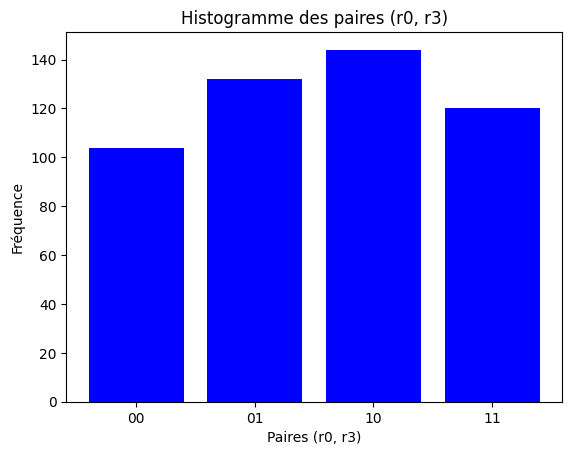

In [6]:
# Données pour l'histogramme
pairs = list(counts.keys())
frequencies = list(counts.values())

# Tracer l'histogramme
plt.bar(pairs, frequencies, color='blue')

# Ajouter des labels et un titre
plt.xlabel('Paires (r0, r3)')
plt.ylabel('Fréquence')
plt.title('Histogramme des paires (r0, r3)')

# Afficher l'histogramme
plt.show()

Probabilité de '00': 0.21
Probabilité de '01': 0.26
Probabilité de '10': 0.29
Probabilité de '11': 0.24


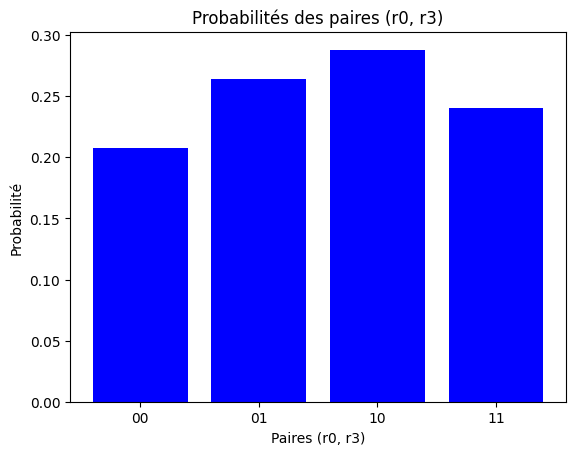

In [7]:

# Initialiser le dictionnaire pour compter les occurrences des paires
counts = {"00": 0, "01": 0, "10": 0, "11": 0}

# Parcourir les résultats et compter les paires
total_results = len(results)
for result in results:
    # Extraire les valeurs de r0 et r3
    r0_value = result['r0']
    r3_value = result['r3']
    
    # Créer une chaîne représentant la paire
    pair = f"{r0_value}{r3_value}"
    
    # Incrémenter le compteur pour cette paire
    if pair in counts:
        counts[pair] += 1

# Calculer les probabilités
probabilities = {pair: counts[pair] / total_results for pair in counts}

# Afficher les probabilités
for pair, prob in probabilities.items():
    print(f"Probabilité de '{pair}': {prob:.2f}")

# Données pour l'histogramme
pairs = list(probabilities.keys())
probabilities = list(probabilities.values())

# Tracer l'histogramme
plt.bar(pairs, probabilities, color='blue')

# Ajouter des labels et un titre
plt.xlabel('Paires (r0, r3)')
plt.ylabel('Probabilité')
plt.title('Probabilités des paires (r0, r3)')

# Afficher l'histogramme
plt.show()
